<a href="https://colab.research.google.com/github/CodeIron/Semiconductor-Opto-Mathematica/blob/master/Semi_Chpt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Jupyter Notebooks for the book: 
##Semiconductor Integrated Optics for Switching Light 2nd Edition
#The nonlinear phase shift via the cascaded 2nd order nonlinearity
#Notebook for Chapter 3:

## Started July 2020

Prof. Charlie Ironside,
Department of Physics and Astronomy,
Curtin University,
Bentley Campus,
Western Australia 6102.

* email: Charlie.Ironside@curtin.edu.au

* web page address:http://oasisapps.curtin.edu.au/staff/profile/view/Charlie.Ironside

In [8]:
# Materials properties for AlGaAs and device parameters
#SI units employed
n_fun=3.45 #refractive index of GaAs at 1800nm
n_SHG=3.6 #refractive index of GaAs at 900nm 
d_eff=150E-12 #Second harmonic generation coefficient for GaAs, d14
len_WG= 0.01 # length of GaAs waveguide in m
miss_match=2.0# phase mismatch in units of Pi
bias=0 # Phase offset in Mach-Zehender interferometer
lambda_fun=1.5E-6 # fundamental wavelength in m
pi=3.1416 #pi
k=(2*pi)/lambda_fun # k vector 
n_diff=n_SHG-n_fun #refractive index diff
grating_period=(2*lambda_fun)/(4*n_diff-miss_match*lambda_fun) #works out grating period
print("Grating Period in m = ",grating_period)



Grating Period in m =  5.000025000125004e-06


The next section calculates and plots the exchange length, fundamental depletion and nonlinear phase shift - the equation numbers are 
refering to "An All-Optical Switch Employing the Cascaded 2nd-Order Nonlinear Effect," IEEE Journal of Quantum Electronics,vol.29,pp.2650-2654,Oct1993
http://dx.doi.org/10.1109/3.250387

Jacobi Elliptic functions in python http://mpmath.org/doc/current/functions/elliptic.html



In [9]:
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from sympy import elliptic_pi, I, pi, O, S
from sympy.abc import z, n, m
# Materials properties for AlGaAs and device parameters for typical AlGaAs waveguide
#SI units employed
def shg(intensity):
    n_fun=3.45 #refractive index of GaAs at 1800nm
    n_SHG=3.6 #refractive index of GaAs at 900nm 
    d_eff=150E-12 #Second harmonic generation coefficient for GaAs, d14
    len_WG= 0.01 #length of GaAs waveguide in m
    miss_match=2.0#phase mismatch in units of Pi
    bias=0 # Phase offset in Mach-Zehender interferometer
    lambda_fun=1.5E-6 # fundamental wavelength in m
    pi=3.1416 #pi
    k=(2*pi)/lambda_fun # k vector 
    n_diff=n_SHG-n_fun #refractive index diff
    grating_period=(2*lambda_fun)/(4*n_diff-miss_match*lambda_fun) #works out grating period
    sn=ellipfun('sn') #define elliptic function
    snnumpy=np.frompyfunc(sn,2,1)#converts from mpmath function to numpy array function
    pinumpy=np.frompyfunc(ellippi,3,1)#converts from mpmath function to numpy array function
    fnumpy=np.frompyfunc(ellipf,2,1)#converts from mpmath function to numpy array function
    intensity=np.linspace(1,3.5E6,10) #Input light intensity W/cm2 
    # intensity=1.5E6 #Input light intensity W/cm2 
    electric_field=sqrt(intensity*1E4*377.0/n_fun) #works out electric field from intensity using impedance of free space
    gamma=k*d_eff*electric_field/(sqrt(n_SHG*n_fun))#gamma parameter see equation 5 
    delta_k=miss_match*pi/len_WG #deltaKL product
    eppi=(2*gamma/delta_k)**2 # see equation 6
    r1sq=(1/(2*eppi))*(-1-sqrt(1+4*eppi))# equation 12a
    r2sq=(1/(2*eppi))*(-1+sqrt(1+4*eppi))# equation 12b
    deplet=1-r2sq
    z=(delta_k*len_WG)/(2*sqrt(2))*sqrt(1+2*eppi+sqrt(1+4*eppi)) #equation 14a
    m=(1+2*eppi-sqrt(1+4*eppi))/(1+2*eppi+sqrt(1+4*eppi))#equation 14b
    alpha=(1+2*eppi+sqrt(1+4*eppi))/sqrt(2) #equation 18
    zpp=4*sqrt(2.0)/sqrt(1+2*eppi+sqrt(1+4*eppi))/delta_k #equation 15
    zp=zpp*fnumpy(pi/2,m)#Eqn 15 - Elliptic function of the first kind EllipticK in Mathematica - NOTE it needs Pi/2 to make it complete
    zpR=np.array(zp,dtype=float)# converts to suitable numpy array
    deplen2=2*len_WG/zp #
    phase=deplen2*pi+2*abs(asin(snnumpy(z,m)))#equation 17
    phaseR=np.array(phase,dtype=float)# converts to suitable numpy array
    thetall=-pinumpy(deplet,phase,m)/alpha#equation 16
    thetallR=np.array(thetall,dtype=float)# converts to suitable numpy array
    thetanl=thetall+delta_k*len_WG #equation 19
    fundamental_remain=1-(1-r2sq)*(snnumpy(z,m))**2 #equation 13
    print(fundamental_remain,thetanl,thetall)
    return fundamental_remain,

shg(1.5E10)

TypeError: ignored

In [25]:
type(intensity)

numpy.ndarray

0.858812505952779 -0.512290034666993 1.0
1.85407987199785 0.668736561358117


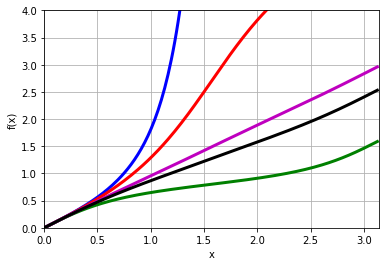

In [5]:
# Jacobi Elliptic functions in python http://mpmath.org/doc/current/functions/elliptic.html
from mpmath import *
e1=10.0
e2=0.5
sn=ellipfun('sn')
a=sn(e1,e2)
cn=ellipfun('cn')
b=cn(e1,e2)
sumsq=a**2+b**2
print(a,b,sumsq)
Pi=3.1416
c=ellipf(Pi/2,0.5)# Elliptic function of the first kind EllipticK in Mathematica note need Pi/2 to make it complete
d=ellippi(1/3,Pi/5,0.3)# Elliptic function of the third kind EllipticPi in Mathematica
print(c,d)
# Elliptic integral Pi(n,z,m) for some different n, m
f1 = lambda z: ellippi(0.9,z,0.9)
f2 = lambda z: ellippi(0.5,z,0.5)
f3 = lambda z: ellippi(-2,z,-0.9)
f4 = lambda z: ellippi(-0.5,z,0.5)
f5 = lambda z: ellippi(-1,z,0.5)
plot([f1,f2,f3,f4,f5], [0,pi], [0,4])

In [6]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
intensity=np.linspace(0,3.5E6,10) #Input light intensity W/cm2 
electric_field=(intensity*1E4 *377/n_fun)
print(intensity)
print(electric_field)

[      0.          388888.88888889  777777.77777778 1166666.66666667
 1555555.55555556 1944444.44444444 2333333.33333333 2722222.22222222
 3111111.11111111 3500000.        ]
[0.00000000e+00 4.24959742e+11 8.49919485e+11 1.27487923e+12
 1.69983897e+12 2.12479871e+12 2.54975845e+12 2.97471820e+12
 3.39967794e+12 3.82463768e+12]


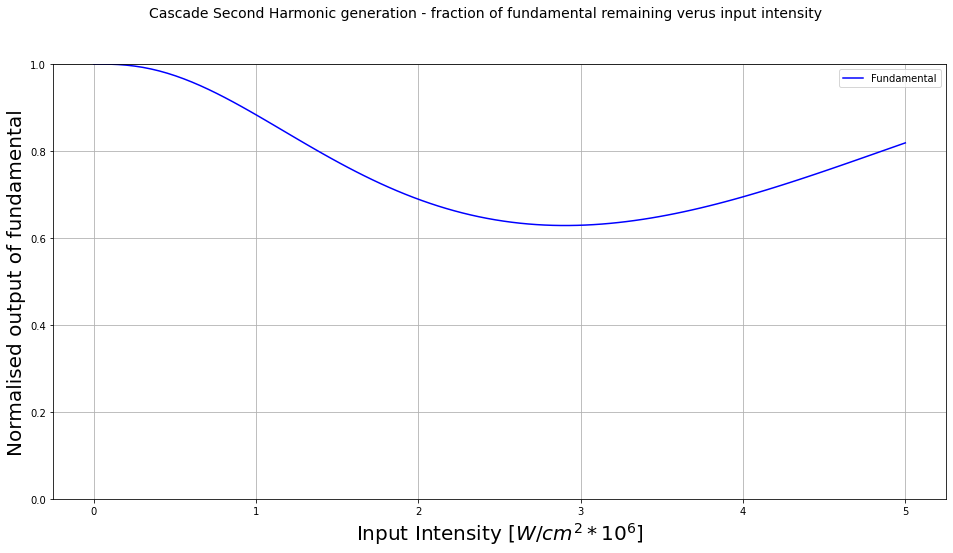

In [110]:
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from sympy import elliptic_pi, I, pi, O, S
from sympy.abc import z, n, m
# Materials properties for AlGaAs and device parameters for typical AlGaAs waveguide
#SI units employed
points=100#number of points to plot
n_fun=3.45 #refractive index of GaAs at 1800nm
n_SHG=3.6 #refractive index of GaAs at 900nm 
d_eff=150E-12 #Second harmonic generation coefficient for GaAs, d14
len_WG= 0.01 #length of GaAs waveguide in m
miss_match=2.0#phase mismatch in units of Pi
bias=0 # Phase offset in Mach-Zehender interferometer
lambda_fun=1.5E-6 # fundamental wavelength in m
pi=3.1416 #pi
k=(2*pi)/lambda_fun # k vector 
n_diff=n_SHG-n_fun #refractive index diff
grating_period=(2*lambda_fun)/(4*n_diff-miss_match*lambda_fun) #works out grating period
sn=ellipfun('sn') #define elliptic function
snnumpy=np.frompyfunc(sn,2,1)#converts from mpmath function to numpy array function
pinumpy=np.frompyfunc(ellippi,3,1)#converts from mpmath function to numpy array function
fnumpy=np.frompyfunc(ellipf,2,1)#converts from mpmath function to numpy array function
intensity=np.linspace(1,5.0E6,points) #Input light intensity W/cm2 
electric_field=(intensity*1E4*377.0/n_fun)**0.5 #works out electric field from intensity using impedance of free space
gamma=k*d_eff*electric_field/((n_SHG*n_fun)**0.5)#gamma parameter see equation 5 
delta_k=miss_match*pi/len_WG #deltaKL product
eppi=(2*gamma/delta_k)**2 # see equation 6
r1sq=(1/(2*eppi))*(-1-(1+4*eppi)**0.5)# equation 12a
r2sq=(1/(2*eppi))*(-1+(1+4*eppi)**0.5)# equation 12b
deplet=1-r2sq
z=(delta_k*len_WG)/(2*(2)**0.5)*(1+2*eppi+(1+4*eppi)**0.5)**0.5 #equation 14a
m=(1+2*eppi-(1+4*eppi)**0.5)/(1+2*eppi+(1+4*eppi)**0.5)#equation 14b
fundamental_remain=1-(1-r2sq)*(snnumpy(z,m))**2 #equation 13
fundamental_remainR=np.array(fundamental_remain,dtype=float)
fig, ax = plt.subplots(1, figsize=(16, 8)) #sets size of figure
plt.suptitle('Cascade Second Harmonic generation - fraction of fundamental remaining verus input intensity',fontsize=14) #writes title
plt.ylabel('Normalised output of fundamental',fontsize=20)#writes y axis label
plt.xlabel('Input Intensity $[W/cm^2 * 10^6] $',fontsize=20)#writes x axis label
plt.plot(intensity*1E-6,fundamental_remainR,'b-',label="Fundamental") #Plots intensity left in fundamental
plt.ylim((0,1)) #sets scale on y-axis
plt.legend(loc=0)#writes legend on graph
plt.grid()#writes grid on graph
plt.show()

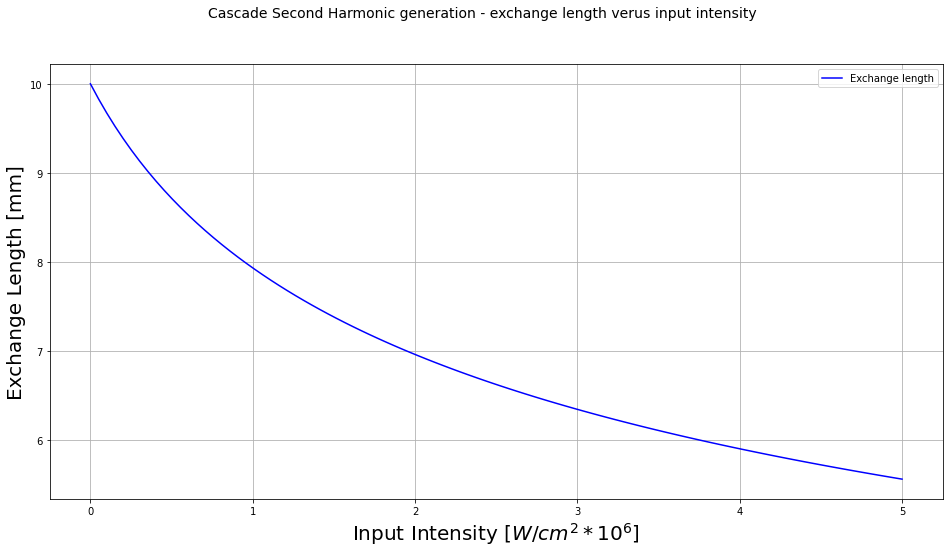

In [28]:
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from sympy import elliptic_pi, I, pi, O, S
from sympy.abc import z, n, m
# Materials properties for AlGaAs and device parameters for typical AlGaAs waveguide
#SI units employed
points=100#number of points to plot
n_fun=3.45 #refractive index of GaAs at 1800nm
n_SHG=3.6 #refractive index of GaAs at 900nm 
d_eff=150E-12 #Second harmonic generation coefficient for GaAs, d14
len_WG= 0.01 #length of GaAs waveguide in m
miss_match=2.0#phase mismatch in units of Pi
bias=0 # Phase offset in Mach-Zehender interferometer
lambda_fun=1.5E-6 # fundamental wavelength in m
pi=3.1416 #pi
k=(2*pi)/lambda_fun # k vector 
n_diff=n_SHG-n_fun #refractive index diff
grating_period=(2*lambda_fun)/(4*n_diff-miss_match*lambda_fun) #works out grating period
sn=ellipfun('sn') #define elliptic function
snnumpy=np.frompyfunc(sn,2,1)#converts from mpmath function to numpy array function
pinumpy=np.frompyfunc(ellippi,3,1)#converts from mpmath function to numpy array function
fnumpy=np.frompyfunc(ellipf,2,1)#converts from mpmath function to numpy array function
intensity=np.linspace(1,5.0E6,points) #Input light intensity W/cm2 
electric_field=(intensity*1E4*377.0/n_fun)**0.5 #works out electric field from intensity using impedance of free space
gamma=k*d_eff*electric_field/((n_SHG*n_fun)**0.5)#gamma parameter see equation 5 
delta_k=miss_match*pi/len_WG #deltaKL product
eppi=(2*gamma/delta_k)**2 # see equation 6
r1sq=(1/(2*eppi))*(-1-(1+4*eppi)**0.5)# equation 12a
r2sq=(1/(2*eppi))*(-1+(1+4*eppi)**0.5)# equation 12b
deplet=1-r2sq
z=(delta_k*len_WG)/(2*(2)**0.5)*(1+2*eppi+(1+4*eppi)**0.5)**0.5 #equation 14a
m=(1+2*eppi-(1+4*eppi)**0.5)/(1+2*eppi+(1+4*eppi)**0.5)#equation 14b
alpha=(1+2*eppi+(1+4*eppi)**0.5)/2**0.5 #equation 18
zpp=4*sqrt(2.0)/(1+2*eppi+(1+4*eppi)**0.5)**0.5/delta_k #equation 15
zp=zpp*fnumpy(pi/2,m)#Eqn 15 - Elliptic function of the first kind EllipticK in Mathematica - NOTE it needs Pi/2 to make it complete
zpR=np.array(zp,dtype=float)# converts to suitable numpy array
fundamental_remain=1-(1-r2sq)*(snnumpy(z,m))**2 #equation 13
fundamental_remainR=np.array(fundamental_remain,dtype=float)
fig, ax = plt.subplots(1, figsize=(16, 8)) #sets size of figure
plt.suptitle('Cascade Second Harmonic generation - exchange length verus input intensity',fontsize=14) #writes title
plt.ylabel('Exchange Length [mm]',fontsize=20)#writes y axis label
plt.xlabel('Input Intensity $[W/cm^2 * 10^6] $',fontsize=20)#writes x axis label
plt.plot(intensity*1E-6,zpR*1E3,'b-',label="Exchange length") #Plots exchange length mm versus intensity
plt.legend(loc=0)#writes legend on graph
plt.grid()#writes grid on graph
plt.show()

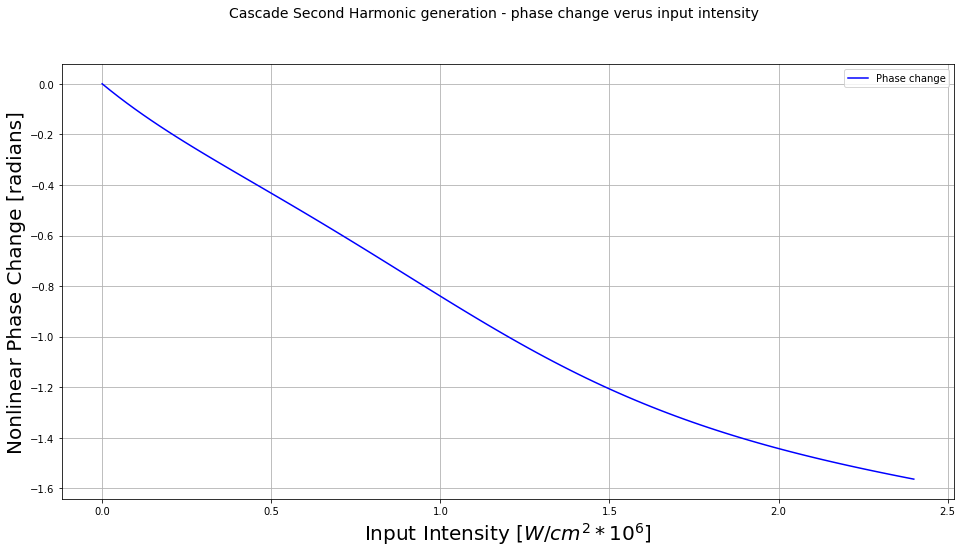

In [160]:
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
# Materials properties for AlGaAs and device parameters for typical AlGaAs waveguide
#SI units employed
points=100#number of points to plot
n_fun=3.45 #refractive index of GaAs at 1800nm
n_SHG=3.6 #refractive index of GaAs at 900nm 
d_eff=150E-12 #Second harmonic generation coefficient for GaAs, d14
len_WG= 0.01 #length of GaAs waveguide in m
miss_match=2.0#phase mismatch in units of Pi
bias=0 # Phase offset in Mach-Zehender interferometer
lambda_fun=1.5E-6 # fundamental wavelength in m
pi=3.1416 #pi
k=(2*pi)/lambda_fun # k vector 
n_diff=n_SHG-n_fun #refractive index diff
grating_period=(2*lambda_fun)/(4*n_diff-miss_match*lambda_fun) #works out grating period
sn=ellipfun('sn') #define elliptic function
snnumpy=np.frompyfunc(sn,2,1)#converts from mpmath function to numpy array function
pinumpy=np.frompyfunc(ellippi,3,1)#converts from mpmath function to numpy array function
fnumpy=np.frompyfunc(ellipf,2,1)#converts from mpmath function to numpy array function
asinumpy=np.frompyfunc(asin,1,1)#converts from mpmath function to numpy array function
intensity=np.linspace(1,2.4E6,points) #Input light intensity W/cm2 
electric_field=(intensity*1E4*377.0/n_fun)**0.5 #works out electric field from intensity using impedance of free space
gamma=k*d_eff*electric_field/((n_SHG*n_fun)**0.5)#gamma parameter see equation 5 
delta_k=miss_match*pi/len_WG #deltaKL product
eppi=(2*gamma/delta_k)**2 # see equation 6
r1sq=(1/(2*eppi))*(-1-(1+4*eppi)**0.5)# equation 12a
r2sq=(1/(2*eppi))*(-1+(1+4*eppi)**0.5)# equation 12b
deplet=1-r2sq
z=(delta_k*len_WG)/(2*(2)**0.5)*(1+2*eppi+(1+4*eppi)**0.5)**0.5 #equation 14a
zR=np.array(z,dtype=float)# converts to suitable numpy array
m=(1+2*eppi-(1+4*eppi)**0.5)/(1+2*eppi+(1+4*eppi)**0.5)#equation 14b
mR=np.array(m,dtype=float)# converts to suitable numpy array
alpha=((1+2*eppi+(1+4*eppi)**0.5)**0.5)/(2**0.5) #equation 18
zpp=4*sqrt(2.0)/(1+2*eppi+(1+4*eppi)**0.5)**0.5/delta_k #equation 15
zp=zpp*fnumpy(pi/2,m)#Eqn 15 - Elliptic function of the first kind EllipticK in Mathematica - NOTE it needs Pi/2 to make it complete
zpR=np.array(zp,dtype=float)# converts to suitable numpy array
deplen2=2*len_WG/zpR #Needed to sort out correct value of ArcSin
phase=deplen2*pi+2*abs(asinumpy(snnumpy(z,m))-pi/2.0)#equation 17
phaseR=np.array(phase,dtype=float)# converts to suitable numpy array
for i in range(points):
    odd=int(deplen2[i])%2==1
    if odd:phaseR[i]=int(deplen2[i])*pi+2*abs(abs(asinumpy(snnumpy(zR[i],mR[i]))-pi/2))
    else :phaseR[i]=int(deplen2[i])*pi+2*abs(asinumpy(snnumpy(zR[i],mR[i])))
#phase=deplen2*pi+2*abs(asinumpy(snnumpy(z,m)-pi/2.0))#equation 17
#phaseR=np.array(phase,dtype=float)# converts to suitable numpy array
thetall=-pinumpy(deplet,phaseR,m)/alpha#equation 16
thetallR=np.array(thetall,dtype=float)# converts to suitable numpy array
thetanl=thetallR+(miss_match*pi) #equation 19
fig, ax = plt.subplots(1, figsize=(16, 8)) #sets size of figure
plt.suptitle('Cascade Second Harmonic generation - phase change verus input intensity',fontsize=14) #writes title
plt.ylabel('Nonlinear Phase Change [radians]',fontsize=20)#writes y axis label
plt.xlabel('Input Intensity $[W/cm^2 * 10^6] $',fontsize=20)#writes x axis label
plt.plot(intensity*1E-6,thetanl,'b-',label="Phase change")#Plots exchange length mm versus intensity
plt.legend(loc=0)#writes legend on graph
plt.grid()#writes grid on graph
#plt.ylim((0,-5))
plt.show()

In [122]:
print(-pinumpy(1.0,1.0,1.0))

-2.05433293325625
